<a href="https://colab.research.google.com/github/julianovale/PO240_Meta_heuristica/blob/main/PO240_A1_An%C3%ADbal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Gráfico do nível do lote econômico

Seja o gráfico do nível de estoque versus tempo: $t \times I(t)$. Neste gráfico, a curva de estoque é tal que: 

* O nível inicial em cada período é o tamanho do lote econômico $q$ no instante de tempo 0, isto é, $(0,q)$; 

* E nível final igual a zero no instante $q/D$, isto é, $(q/D,0)$.



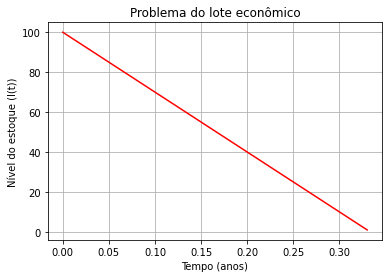

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt 

q = 100
D = 300

t = np.arange(0,q/D,(q/D)/100) 
I = -(D)*t + q
plt.plot(t,I,'-r')
plt.title("Problema do lote econômico") 
plt.xlabel("Tempo (anos)") 
plt.ylabel("Nível do estoque (I(t))") 
plt.grid()
plt.show()

# 2. Gráfico de custo versus tamanho do lote


A função de custo total de um lote econômico é uma composição de 3 funções. A saber:

* Custo de realização de pedidos no período:
$CP(q) = \frac{KD}{q}$, onde:

> K - custo de realizar um pedido;

> D - demanda do produto no período considerado;

> q - tamanho do lote. 

> $\frac{D}{q}$ - é o número de lotes a serem adquiridos ao longo período para atender a demanda $D$.


* Custo de compra para atender a demanda no período:
$CC = pD$, onde:

> p - preço do produto;

> D - demanda do produto no período considerado.

* Custo de estoque no período:
$CE(q) = \frac{hq}{2}$, onde:

> q - é o tamanho do lote; 

> h - é o custo de armazenagem de um item;

> $\frac{q}{2}$ é o nível médio de estoque em um ciclo do período considerado.

* Custo total de um lote de tamanho **q**:
$CT(q) = CP(q) + CC + CE(q)$

Para encontrar o valor do lote econômico **$q^*$** tal que a função **TC(q)** é mínima, calcula-se:

$CT'(q) = CP'(q) + CE'(q) = 0$

onde:

$CP'(q) = -\frac{KD}{q*^2}$,

$CE'(q) = \frac{h}{2}$.

Com isso, têm-se:

$\frac{KD}{q*^2} = \frac{h}{2}$

$q* = \sqrt{\frac{2KD}{h}}$

Sejam os seguintes parâmetros:

* p - preço do produto = 0,50;
* h - custo de armazenagem = 0,05;
* K - custo de fazer o pedido = 20;
* D - demanda = 300;

Deseja-se calcular:

$q* = \sqrt{\frac{2KD}{h}}$










In [ ]:
p = 0.5
h = 0.05
K = 0.84
D = 300

q = (2*K*D/h)**(0.5)

print("Tamanho do lote econômico:",q)

Tamanho do lote econômico: 100.39920318408906


# 3. Gráficos das funções de custo do lote econômico

O programa dado a seguir exibe como criar os gráficos relativos às funções de custo do lote econômico descritas anteriormente para os seguintes parâmetros:

* p - preço do produto = 0,50;
* h - custo de armazenagem = 0,05;
* K - custo de fazer o pedido = 20;
* D - demanda = 300;

Para tanto, será necessário necessário desenhar:

* Cada uma das funções de custo;
* A função de custo total CT;
* O ponto no qual é dado o lote econômico ótimo q*.

Para desenhar o ponto relativo à q* é útil lembrar que:

$q* = \sqrt{\frac{2KD}{h}}$


Lote econômico (q*) =  31.74901573277509
Custo total de q* =  255.87450786638755


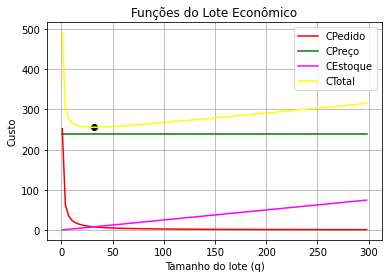

In [ ]:
#@title Gráficos dos custos do lote econômico { run: "auto" }

# Importando a biblioteca para fazer gráficos.
import matplotlib.pyplot as plt
import numpy as np

p =  0.8#@param {type:"number"}
h = 0.5 #@param {type:"number"}
K = 0.84 #@param {type:"number"}
D = 300 #@param {type:"number"}

# Criando gráficos de cada função.
q = np.arange(1,D,D/100)

# Funções
cp = (K*D)*(1./q)
cc = np.full((len(q),1), p*D)
cc = np.concatenate(cc,axis=0)
ce = (h/2)*q
ct = np.add(np.add(cp,ce),cc)
# q ótimo1
qo = (2*K*D/h)**(0.5) 
co = (K*D)*(1/qo) + p*D + (h/2)*qo 
print("Lote econômico (q*) = ",qo)
print("Custo total de q* = ",co)

# Gráficos das funções
plt.plot(q, cp, color='red') 
plt.plot(q, cc, color='green')
plt.plot(q, ce, color='magenta')
plt.plot(q, ct, color='yellow')
plt.scatter(qo,co,color='black', marker='o')
plt.title('Funções do Lote Econômico')
plt.xlabel('Tamanho do lote (q)')
plt.ylabel('Custo')
plt.legend(['CPedido','CPreço','CEstoque','CTotal']) # Definindo legenda
plt.grid()                            # Criando uma grade 
plt.show()

# 4. Desenhando modelos de programação linear

## 4.1. Modelo de produção

Seja o modelo de decisão de produção de dois produtos P1 e P2. Formular em termos de programação linear e fazer o gráfico da região factível.

### Variáveis de decisão:

$x_1$: quantidade a ser produzida do produto P1

$x_2$: quantidade a ser produzida do produto P2

### Modelo:

$$\begin{eqnarray}
\mbox{maximizar    } & & 5 x_1 + 2 x_2 \\
\mbox{sujeito a:   } & &  x_1 \leqslant 3 \\ 
& & x_2 \leqslant 4 \\
& & x_1 + 2x_2 \leqslant 9 \\
& & x_1, x_2 \geqslant 0 
\end{eqnarray}$$

O código em Python é dado a seguir.

Referência: https://paulminogue.com/index.php/2020/07/20/an-introduction-to-linear-programming-in-python/

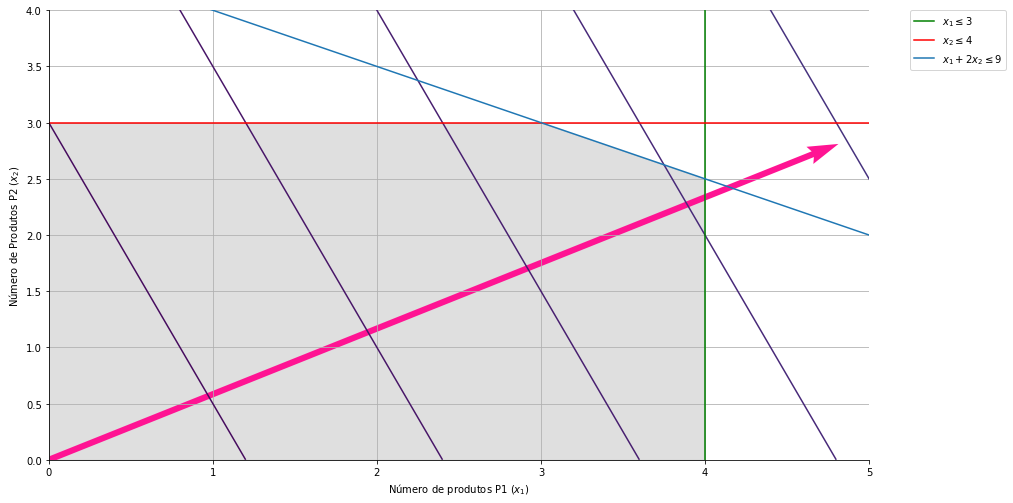

In [ ]:
# Importando a biblioteca para fazer gráficos.
import matplotlib.pyplot as plt
import numpy as np

# Obtendo os valores das retas que definem os limites da região factível.
x_1 = np.linspace(0, 30, 1000)
x_2 = np.linspace(0, 30, 1000)

# Definindo as dimensões da figura.
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)

# desenhando restrições
plt.axvline(4, color='g', label=r'$x_1 \leq 3$') # restrição 1
y_1 = 3
plt.axhline(y_1, color='r', label=r'$x_2 \leq 4$') # restrição 2
y_2 = 4.5 - (0.5*(x_1))
plt.plot(x_1, y_2, label=r'$x_1 + 2x_2 \leq 9$') # restrição 3
plt.xlim(0,5)
plt.ylim(0,4)
plt.xlabel(r'Número de produtos P1 ($x_1$)')
plt.ylabel(r'Número de Produtos P2 ($x_2$)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Desenhando a região factível
plt.fill_between(x_1, np.minimum(y_2, y_1), where=x_1 <= 4, color='gray', alpha=0.25)

# Esconde delimitações do gráfico.
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# vetor gradiente: a função f é linear, logo o gradiente é o mesmo em todos os pontos
fx1 = 5  # derivada parcial de f em relação a x1
fx2 = 2  # derivada parcial de f em relação a x2
ax.quiver(fx1,fx2, color='deeppink', scale_units='xy', scale=1)  # (gradiente de f)(x,y) = [fx, fy]

# Curvas de nível.
X1, X2 = np.meshgrid(x_1, x_2)  # cria a grade (domínio)
Z = 5*X1 + 2*X2                 # função que se deseja maximizar ou minimizar
plt.contour(X1, X2, Z, 40)      # gráfico com 40 curvas de nível de z

# Grade e exibe o gráfico.
plt.grid()
plt.show()

## 4.2. Modelo com múltiplas soluções

Seja o modelo de programação linear como dado a seguir. Fazer o gráfico da região factível.


### Modelo:

$$\begin{eqnarray}
\mbox{maximizar    } & & 6 x_1 + 10 x_2 \\
\mbox{sujeito a:   }  & & x_1 \leqslant 5 \\
& & x_2 \leqslant 6 \\
& &  -x_1 + x_2 \leqslant 2 \\
& & 3x_1 + 5x_2 \geqslant 15 \\
& & 5x_1 + 4x_2 \geqslant 20 \\
& & x_1, x_2 \geqslant 0 
\end{eqnarray}$$

O código em Python é dado a seguir.

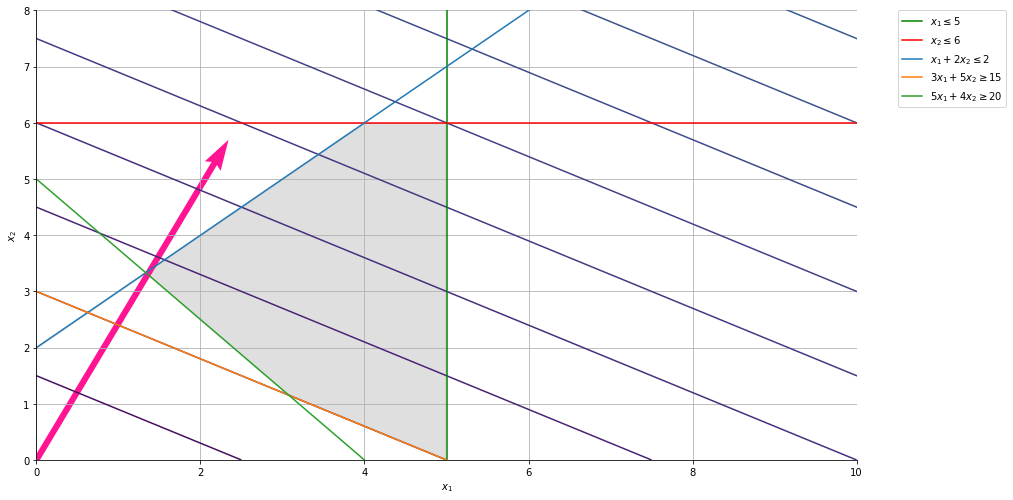

In [ ]:
# Importando a biblioteca para fazer gráficos.
import matplotlib.pyplot as plt
import numpy as np

# Obtendo os valores das retas que definem os limites da região factível.
x_1 = np.linspace(0, 30, 1000)
x_2 = np.linspace(0, 30, 1000)

# Definindo as dimensões da figura.
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)

# desenhando restrições
plt.axvline(5, color='g', label=r'$x_1 \leq 5$') # restrição 1
y_1 = 6
plt.axhline(y_1, color='r', label=r'$x_2 \leq 6$') # restrição 2
y_2 = 2 + x_1
plt.plot(x_1, y_2, label=r'$x_1 + 2x_2 \leq 2$') # restrição 3
y_3 = 3 - (3/5)*x_1
plt.plot(x_1, y_3, label=r'$3x_1 + 5x_2 \geq 15$') # restrição 4
y_4 = 5 - (5/4)*x_1
plt.plot(x_1, y_4, label=r'$5x_1 + 4x_2 \geq 20$') # restrição 5
plt.xlim(0,10)
plt.ylim(0,8)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Desenhando a região factível
y21 = np.minimum(y_2, y_1)
y43 = np.maximum(y_3,y_4)
y4321 = np.minimum(y21,y43)
plt.fill_between(x_1, y21, y4321, where=x_1 <= 5, color='gray', alpha=0.25)

# Esconde delimitações do gráfico.
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# vetor gradiente: a função f é linear, logo o gradiente é o mesmo em todos os pontos
fx1 = 6   # derivada parcial de f em relação a x1
fx2 = 10  # derivada parcial de f em relação a x2
ax.quiver(fx1,fx2, color='deeppink', scale_units='xy', scale=2)  # (gradiente de f)(x,y) = [fx, fy]

# Curvas de nível.
X1, X2 = np.meshgrid(x_1, x_2)  # cria a grade (domínio)
Z = 6*X1 + 10*X2                # função que se deseja maximizar ou minimizar
plt.contour(X1, X2, Z, 40)      # gráfico com 40 curvas de nível de z

# Grade e exibe o gráfico.
plt.grid()
plt.show()

## 4.2. Modelo com solução ilimitada

Seja o modelo de programação linear como dado a seguir. Fazer o gráfico da região factível.


### Modelo:

$$\begin{eqnarray}
\mbox{maximizar    } & & 6 x_1 + 10 x_2 \\
\mbox{sujeito a:   }  
& & x_2 \leqslant 6 \\
& &  -x_1 + x_2 \leqslant 2 \\
& & 3x_1 + 5x_2 \geqslant 15 \\
& & 5x_1 + 4x_2 \geqslant 20 \\
& & x_1, x_2 \geqslant 0 
\end{eqnarray}$$

O código em Python é dado a seguir.

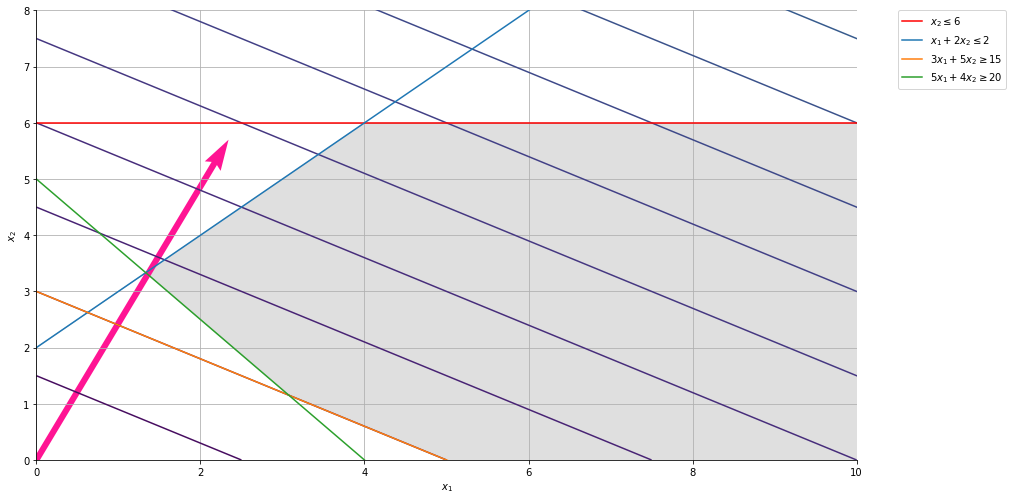

In [ ]:
# Importando a biblioteca para fazer gráficos.
import matplotlib.pyplot as plt
import numpy as np

# Obtendo os valores das retas que definem os limites da região factível.
x_1 = np.linspace(0, 30, 1000)
x_2 = np.linspace(0, 30, 1000)

# Definindo as dimensões da figura.
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)

# desenhando restrições
#plt.axvline(5, color='g', label=r'$x_1 \leq 5$') # restrição 1
y_1 = 6
plt.axhline(y_1, color='r', label=r'$x_2 \leq 6$') # restrição 2
y_2 = 2 + x_1
plt.plot(x_1, y_2, label=r'$x_1 + 2x_2 \leq 2$') # restrição 3
y_3 = 3 - (3/5)*x_1
plt.plot(x_1, y_3, label=r'$3x_1 + 5x_2 \geq 15$') # restrição 4
y_4 = 5 - (5/4)*x_1
plt.plot(x_1, y_4, label=r'$5x_1 + 4x_2 \geq 20$') # restrição 5
plt.xlim(0,10)
plt.ylim(0,8)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Desenhando a região factível
y21 = np.minimum(y_2, y_1)
y43 = np.maximum(y_3,y_4)
y4321 = np.minimum(y21,y43)
plt.fill_between(x_1, y21, y4321, where=x_1 >= 0, color='gray', alpha=0.25)

# Esconde delimitações do gráfico.
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# vetor gradiente: a função f é linear, logo o gradiente é o mesmo em todos os pontos
fx1 = 6   # derivada parcial de f em relação a x1
fx2 = 10  # derivada parcial de f em relação a x2
ax.quiver(fx1,fx2, color='deeppink', scale_units='xy', scale=2)  # (gradiente de f)(x,y) = [fx, fy]

# Curvas de nível.
X1, X2 = np.meshgrid(x_1, x_2)  # cria a grade (domínio)
Z = 6*X1 + 10*X2                # função que se deseja maximizar ou minimizar
plt.contour(X1, X2, Z, 40)      # gráfico com 40 curvas de nível de z

# Grade e exibe o gráfico.
plt.grid()
plt.show()

## 4.3. Modelo sem solução factível

Seja o modelo de programação linear como dado a seguir. Fazer o gráfico da região factível.


### Modelo:

$$\begin{eqnarray}
\mbox{maximizar    } & &  x_1 + x_2 \\
\mbox{sujeito a:   }  
& &  x_1 + x_2 \leqslant 2 \\
& &  x_1 + x_2 \geqslant 6 \\
& & x_1, x_2 \geqslant 0 
\end{eqnarray}$$

O código em Python é dado a seguir.

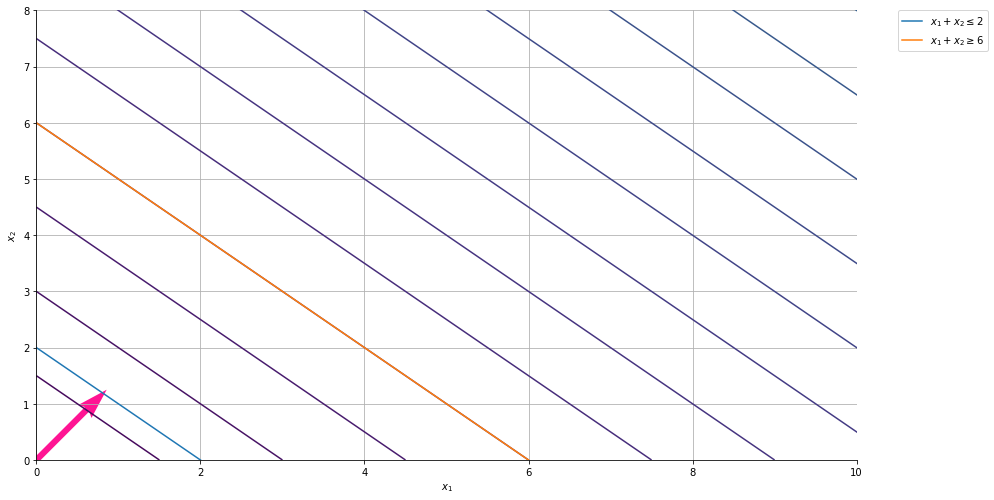

In [ ]:
# Importando a biblioteca para fazer gráficos.
import matplotlib.pyplot as plt
import numpy as np

# Obtendo os valores das retas que definem os limites da região factível.
x_1 = np.linspace(0, 30, 1000)
x_2 = np.linspace(0, 30, 1000)

# Definindo as dimensões da figura.
fig, ax = plt.subplots()
fig.set_size_inches(14.7, 8.27)

# desenhando restrições
y_1 = 2 - x_1
plt.plot(x_1, y_1, label=r'$x_1 + x_2 \leq 2$') # restrição 1
y_2 = 6 - x_1
plt.plot(x_1, y_2, label=r'$x_1 + x_2 \geq 6$') # restrição 2
plt.xlim(0,10)
plt.ylim(0,8)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Esconde delimitações do gráfico.
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# vetor gradiente: a função f é linear, logo o gradiente é o mesmo em todos os pontos
fx1 = 1  # derivada parcial de f em relação a x1
fx2 = 1  # derivada parcial de f em relação a x2
ax.quiver(fx1,fx2, color='deeppink', scale_units='xy', scale=1)  # (gradiente de f)(x,y) = [fx, fy]

# Curvas de nível.
X1, X2 = np.meshgrid(x_1, x_2)  # cria a grade (domínio)
Z = X1 + X2                # função que se deseja maximizar ou minimizar
plt.contour(X1, X2, Z, 40)      # gráfico com 40 curvas de nível de z

# Grade e exibe o gráfico.
plt.grid()
plt.show()